In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

In [2]:
import os
print(os.listdir('.'))

['.ipynb_checkpoints', 'idvgs.pdf', 'plot-idvds.ipynb', 'plot-idvgs.ipynb', 'T0022ALL.CSV', 'T0023ALL.CSV', 'T0024ALL.CSV', 'T0025ALL.CSV', 'T0026ALL.CSV', 'T0027ALL.CSV', 'T0028ALL.CSV', 'T0033ALL.CSV', 'T0034ALL.CSV', 'T0035ALL.CSV', 'T0036ALL.CSV', 'T0037ALL.CSV', 'T0038ALL.CSV', 'T0039ALL.CSV', 'T0040ALL.CSV']


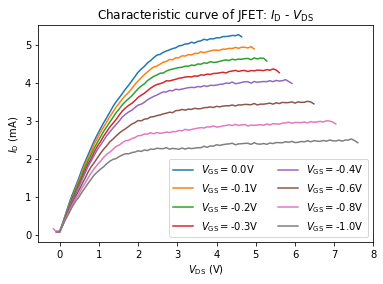

In [13]:
rd = 990
arr_vds = list()
arr_eyed = list()
filelist = ['T0033ALL.CSV', 'T0034ALL.CSV', 'T0035ALL.CSV', 'T0036ALL.CSV', 'T0037ALL.CSV', 'T0038ALL.CSV', 'T0039ALL.CSV', 'T0040ALL.CSV']
vgslabel = ['0.0', '-0.1', '-0.2', '-0.3', '-0.4', '-0.6', '-0.8', '-1.0']

for filename, label in zip(filelist, vgslabel):
    arr_vds = list()
    arr_eyed = list()
    with open(filename, 'r') as f:
        for _ in range(16):
            f.readline()
        while True:
            try:
                _, vdd, _, vds, _, vgs, _, battery, _, _, _, mat = f.readline().strip().split(',')
                vdd, vds, vgs, battery, mat = map(float, [vdd, vds, vgs, battery, mat])
                eyed = (vdd - vds) / rd
                arr_vds.append(vds); arr_eyed.append(eyed)
            except:
                break

    temp = list(zip(arr_vds, arr_eyed))
    G = {}
    for x, y in temp:
        try:
            G[x].append(y)
        except:
            G[x] = []
            G[x].append(y)

    x = list()
    y = list()
    for key, value in G.items():
        x.append(key)
        y.append(np.average(value))

    temp = list(zip(x, y))
    temp.sort(key=lambda a: a[0])
    x, y = np.transpose(temp)
    x = np.array(x)
    y = np.array(y) * 1000
    plt.plot(x, y, label='$V_{\mathrm{GS}} = $%sV' % (label))

plt.xlabel('$V_{\mathrm{DS}}$ (V)')
plt.ylabel('$I_{\mathrm{D}}$ (mA)')
plt.title('Characteristic curve of JFET: $I_{\mathrm{D}}$ - $V_{\mathrm{DS}}$')
plt.legend(loc=0, ncol=2)
plt.savefig('idvds.pdf')

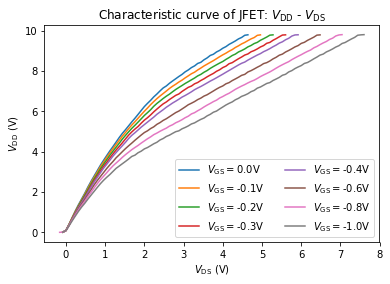

In [15]:
rd = 990
arr_vds = list()
arr_vdd = list()
arr_eyed = list()
filelist = ['T0033ALL.CSV', 'T0034ALL.CSV', 'T0035ALL.CSV', 'T0036ALL.CSV', 'T0037ALL.CSV', 'T0038ALL.CSV', 'T0039ALL.CSV', 'T0040ALL.CSV']
vgslabel = ['0.0', '-0.1', '-0.2', '-0.3', '-0.4', '-0.6', '-0.8', '-1.0']

for filename, label in zip(filelist, vgslabel):
    arr_vds = list()
    arr_eyed = list()
    with open(filename, 'r') as f:
        for _ in range(16):
            f.readline()
        while True:
            try:
                _, vdd, _, vds, _, vgs, _, battery, _, _, _, mat = f.readline().strip().split(',')
                vdd, vds, vgs, battery, mat = map(float, [vdd, vds, vgs, battery, mat])
                eyed = (vdd - vds) / rd
                arr_vds.append(vds); arr_eyed.append(eyed); arr_vdd.append(vdd)
            except:
                break

    temp = list(zip(arr_vds, arr_vdd))
    G = {}
    for x, y in temp:
        try:
            G[x].append(y)
        except:
            G[x] = []
            G[x].append(y)

    x = list()
    y = list()
    for key, value in G.items():
        x.append(key)
        y.append(np.average(value))

    temp = list(zip(x, y))
    temp.sort(key=lambda a: a[0])
    x, y = np.transpose(temp)
    x = np.array(x)
    y = np.array(y)
    plt.plot(x, y, label='$V_{\mathrm{GS}} = $%sV' % (label))

plt.xlabel('$V_{\mathrm{DS}}$ (V)')
plt.ylabel('$V_{\mathrm{DD}}$ (V)')
plt.title('Characteristic curve of JFET: $V_{\mathrm{DD}}$ - $V_{\mathrm{DS}}$')
plt.legend(loc=0, ncol=2)